<!-- \title{}
\author{}
\maketitle -->
# QISKIT Lab 3 - Quantum Teleportation

1. S. G. Nana Engo, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
1. J-P. Tchapet Njafa, jean-pierre.tchapet-njafa@univ-maroua.cm
    * Department of Physics, Faculty of Science, University of Maroua
1. P. Djorwe, djorwepp@gmail.com
    * Department of Physics, Faculty of Science, University of Ngaoundere
      
*Adaptation of the [Qiskit Doc](https://qiskit.org/documentation/).*

January 2023

*Prérequis cours*
- Chapitre 2 Portes Quantiques
- Chapitre 3 Outils et Protocoles quantiques

*Autres documents pertinents (web)*
- [Access IBM Quantum Systems](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [IBM Quantum Systems Configuration](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [Transpile](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantum account](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html)  

$\newcommand{\ket}[1]{|#1\rangle}$

<div class="alert alert-warning"> Dans un Jupyter Notebook,
    <ul>
        <li>pour obtenir de l'aide sur une fonction, placez le curseur de texte sur la fonction et appuyez sur <code>Shift + Tab</code></li>
        <li>pour exécuter une cellule, appuyez sur <code>Shift + Return / Enter</code>.</li>
    </ul>
</div>

<div class="alert alert-info">
Pour des besoins de coherence entre les développements analytiques et les résulats des simulations, nous adoptons ici la notation de Qiskit:
\begin{align*}
& |j_{n-1}...j_1j_0\rangle&&\text{ pour un système de $n$-qubits}\\
&Q_{n-1}\otimes\cdots\otimes Q_1\otimes Q_0&&\text{ pour un produit tensoriel} 
\end{align*}
En d'autres termes, dans Qiskit, $|01\rangle\equiv\underset{\text{qubit 1}}{|0\rangle}\ \underset{\text{qubit 0}}{|1\rangle}$, qui est à l'opposé de ce que nous utilisons dans nos notes de cours, $|01\rangle\equiv\underset{\text{qubit 0}}{|0\rangle}\ \underset{\text{qubit 1}}{|1\rangle}$.
</div>

# Définition et problématique

## Définition

La **téléportation ou fax quantique** est un protocole de communications quantiques consistant à **transférer** l'état quantique d'un système vers un autre système similaire et séparé spatialement du premier en mettant à profit
l'intrication quantique. 

Contrairement à ce que le nom laisse entendre, **il ne s'agit donc pas de transfert de matière**. Le terme de téléportation quantique est utilisé pour souligner le fait que le processus est destructif: à l'issue de la
téléportation, le premier système ne sera plus dans le même état qu'initialement.

La téléportation quantique pourrait être intéressant pour le calcul quantique en ce sens qu'elle peut servir pour le transfert de l'information quantique entre différentes unités indépendantes du calculateur quantique.

## Problématique et outils

Sa problématique est résumée par la figure ci-dessous et expliquée par la suite.
<center> <img src="./Graphics/Teleportation.png" width=300 /></center>

Il était une fois, Alice et Bob qui, avant de se séparer, prirent chacun un qubit d'une même paire EPR, par exemple, $\ket{B_{00}}_{21}=\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})_{21}$. Puis Bob s'en alla, vers une galaxie ignorée d'Alice.

C'est alors que, bien plus tard, **un qubit dans un état inconnu**, $\ket{\varphi}_0=\alpha\ket{0}_0+\beta\ket{1}_0$, arriva chez Alice. Mission d'Alice, transmettre l'état de $\ket{\varphi}_0$ à Bob.

Mais Alice ne pouvait pas,
* porter ce qubit à Bob (qui était dans une une galaxie ignorée d'Alice),
* ni cloner $\ket{\varphi}_0$ pour en disperser des copies dans l'univers (**Théorème de non-clonage quantique**),
* ni connaître $\alpha$ et $\beta$ pour diffuser leurs valeurs sur les ondes dans l'espace intergalactique (qubit dans un état inconnu et une mesure de $\alpha$ (ou $\beta$) réduirait malheureusement $\ket{\varphi}_0$ à $\ket{0}_0$ (ou $\ket{1}_0$)).


Alors Alice devait téléporter $\ket{\varphi}_0=\alpha\ket{0}_0+\beta\ket{1}_0$. Ils avaient prévu tout ce qu'il fallait:

* Un _canal quantique_, la paire EPR $\ket{B_{00}}_{21}$, dont ils avaient soigneusement gardé chacun un qubit avant de se séparer;

* Alice avait avec elle la **BSM** ou **Bell State Measurement** constituée de deux portes quantiques logiques, la porte de Walsh-Hadamard $ \mathtt{W}\ket{x}=\frac{1}{\sqrt{2}}\sum_y(-1)^{xy} \ket{y}$.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

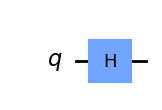

In [2]:
qb = QuantumCircuit(1)
qb.h(0)
qb.draw('mpl')

et la porte conditionnelle NOT, $\mathtt{CX}\ket{yx}=\mathtt{X}^x\ket{y}\ket{x},\ x,y=\{0,1\}$, dont la table de vérité est, avec c=control; t=target (cible)

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |


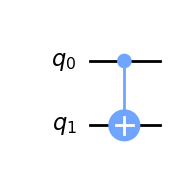

In [3]:
qb1 = QuantumCircuit(2)
qb1.cx(0,1)
qb1.draw('mpl')

et deux appareils de mesure $M_x,\, M_y$ qui pouvaient donner deux bits classiques $b_x,\,b_y=\{0,1\}$, communicables par un _canal classique_ (Téléphone, Internet) à Bob;

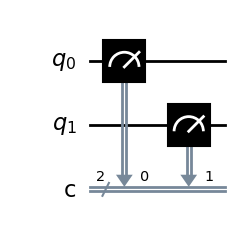

In [4]:
qb2 = QuantumCircuit(2,2)
qb2.measure(range(2),range(2))
qb2.draw('mpl')

* Bob avait pris dans son vaisseau l'opérateur unitaire (**décodeur**) 1-qubit $\mathtt{U}_{xy}=\mathtt{X}^x\mathtt{Z}^y$.

# Différentes étapes de la téléportation quantique

## Modules nécessaires


In [5]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import IfElseOp

from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector

## Initialisation du circuit quantique

Le protocole de téléportation quantique va utiliser 
* 3 qubits 
    * 1 qubit $\ket{\varphi}_0=\alpha\ket{0}_0+\beta\ket{1}_0$ à téléporter
    * 1 qubit $q_1$ pour Alice
    * 1 qubit $q_2$ pour Bob
    
* 2 bits classiques pour stocker $b_x$ et $b_z$

* Nous allons inclure un troisième registre pour mesurer le résultat de Bob

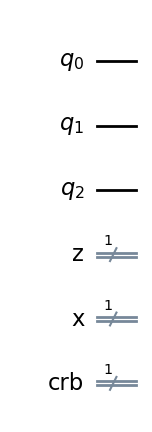

In [6]:
qr = QuantumRegister(3, name="q")    
crz = ClassicalRegister(1, name="z") 
crx = ClassicalRegister(1, name="x") 

crb = ClassicalRegister(1, name="crb")

qc_telep = QuantumCircuit(qr,crz,crx,crb) 
qc_telep.draw('mpl')

## Etape 1 - Préparation

Utiliser deux qubits $\ket{ab}$ pour créer une paire Bell intriquée. $\ket{a}$ est emporté par Alice, $\ket{b}$ est emporté par Bob.

In [7]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into the superposition state |+>
    qc.cx(a,b) # CNOT with a as control and b as target


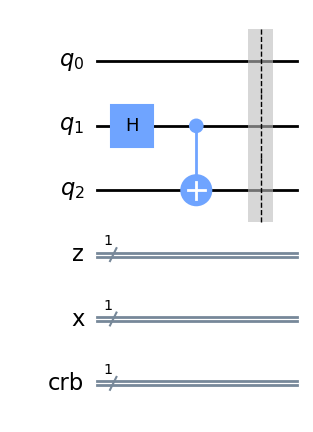

In [8]:
## STEP 1
create_bell_pair(qc_telep, 1, 2)
qc_telep.barrier() # Use barrier to separate steps
qc_telep.draw('mpl')

Alice possède $q_1$ et Bob $q_2$ après leur séparation.

* Vérifions qu'on obtient effectivement la paire EPR $\ket{B_{00}}_{21}$:

\begin{equation}
\begin{aligned}
\ket{00}_{21}\ket{0}_0&=(\mathtt{CX}_{[21]}(\mathtt{I}_2\otimes\mathtt{H}_1)\ket{00}_{21})\ket{0}_0\\
&=\frac{1}{\sqrt{2}}\mathtt{CX}\ket{0}_2(\ket{0}+\ket{1})_1\ket{0}_0\\
&=\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})_{21}\ket{0}_0
\end{aligned}
\end{equation}

In [9]:
Bell00 = Statevector.from_label('000')
Bell00 = Bell00.evolve(qc_telep)
Bell00.draw('latex', prefix='|B_{00}_{21}\\rangle|0\\rangle_0=')

<IPython.core.display.Latex object>

## Etape 2 - BSM

### Encodage

Alice applique $\mathtt{CX}_{10}$ sur sa moitié $q_1$ de l'EPR, contrôlée par $\ket{\varphi}_0$. Par la suite, elle applique $\mathtt{H}_{0}$ sur $\ket{\varphi}_0$.


In [10]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

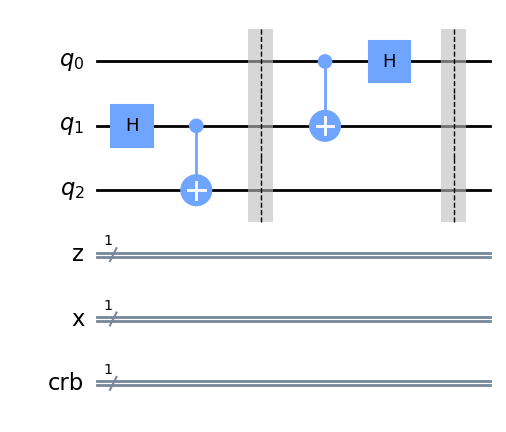

In [11]:
## STEP 2
alice_gates(qc_telep, 0, 1)
qc_telep.barrier()
qc_telep.draw('mpl')

Analytiquement, 
\begin{equation*}
\begin{aligned}
\ket{B_{00}}_{21}\otimes \ket{\varphi}_0& =\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})_{21} 
(\alpha\ket{0}+\beta\ket{1})_0\\
&\xrightarrow{\mathtt{CX}_{10}}\frac{\alpha}{\sqrt{2}}  
(\ket{00}+\ket{11})_{21}\ket{0}_0+\frac{\beta}{\sqrt{2}}(\ket{01}+\ket{10})_{21}\ket{1}_0\\
&\xrightarrow{\mathtt{H}_0}\frac{\alpha}{2}(\ket{00}+\ket{11})_{21}(\ket{0}+\ket{1})_0
+\frac{\beta}{2}(\ket{10}+\ket{01})_{21}(\ket{0}-\ket{1})_0\\
&=\frac{\alpha}{2}(\ket{000}+\ket{110}+\ket{001}+\ket{111})
+\frac{\beta}{2}(\ket{100}+\ket{010}-\ket{101}-\ket{011})
\end{aligned}
\end{equation*}

\begin{equation}
\begin{aligned}
(\mathtt{H}_0\mathtt{CX}_{10})\ket{B_{00}}_{21}\otimes\ket{\varphi}_0&=\frac{1}{2}\{(\alpha\ket{0}+\beta\ket{1})_2\ket{00}_{10}
+(\alpha\ket{1}+\beta\ket{0})_2\ket{10}_{10} \\
&+(\alpha\ket{0}-\beta\ket{1})_2\ket{01}_{10}
+(\alpha\ket{1} -\beta\ket{0})_2\ket{11}_{10}\}.
\end{aligned}
\end{equation}

## Etape 3 - Mesure et Transmission 

* Alice applique ensuite une mesure sur les deux qubits en sa possession $q'_1$ et $\ket{\varphi'}_0$ et stocke les résultats $x$ (pour $q'_1$) et $z$ ($\ket{\varphi'}_0$) dans deux bits classiques $b_x,\,b_z=\{0,1\}$.

En vertu du développement analytique précédent, les quatres resultats possibles obtenus par Alice sont $00,\ 01, \ 10, \ 11$.
 
* Alice transmet par un canal classique les deux bits classiques  $b_x,\,b_y=\{0,1\}$ à Bob.


In [12]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.measure(a,0)
    qc.measure(b,1)

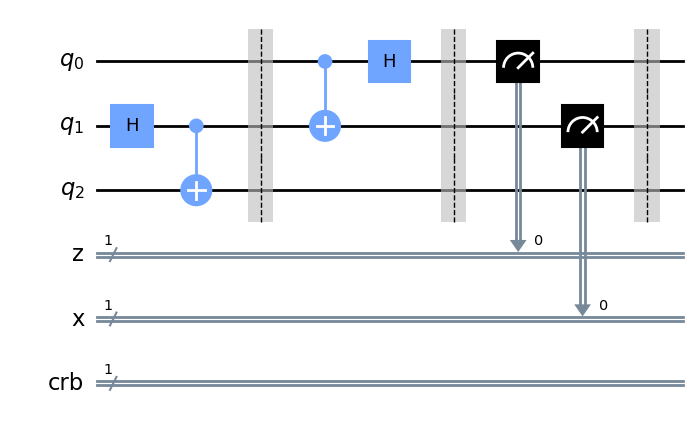

In [13]:
measure_and_send(qc_telep, 0 ,1)
qc_telep.barrier()
qc_telep.draw('mpl')

## Etape 4 - Décodage

* Grâce à ces bits classiques, Bob applique l'opérateur unitaire adéquat $\mathtt{U}_{xy}=\mathtt{X}^x\mathtt{Z}^z$.

La mesure d'Alice projette l'état du qubit $q_2$ de Bob dans un des états $\ket{\varphi_{xy}}$:
 
 |Mesure d'Alice $xy$ | Etat projeté $\ket{\varphi_{xy}}$|$\mathtt{U}_{xy}=\mathtt{X}^x\mathtt{Z}^y$|
 |:------------------:|:--------------------------------:|--------------------------|
 |$00$                | $\alpha\ket{0}$ + $\beta\ket{1}$ |$\mathtt{X}^0\mathtt{Z}^0=\mathtt{I}$             |
 |$01$                | $\alpha\ket{0}$ - $\beta\ket{1}$ |$\mathtt{X}^0\mathtt{Z}^1=\mathtt{Z}$             |
 |$10$                | $\alpha\ket{1}$ + $\beta\ket{0}$ |$\mathtt{X}^1\mathtt{Z}^0=\mathtt{X}$             |
 |$11$                | $\alpha\ket{1}$ - $\beta\ket{0}$ |$\mathtt{X}^1\mathtt{Z}^1=\mathtt{X}\mathtt{Z}$           |


In [14]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
  
def bob_gates(qc, qubit, crz, crx):
# Here we use qc.if_test to control our gates with a classical
# bit instead of a qubit
    with qc.if_test((crx, 1)):
        qc.x(qubit)
    with qc.if_test((crz, 1)):
            qc.z(qubit)

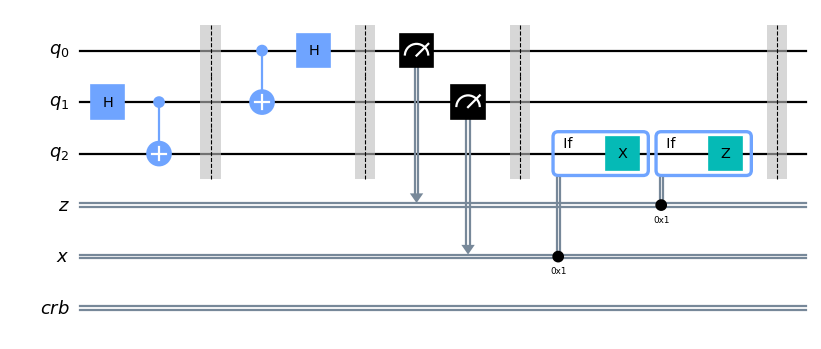

In [15]:
## STEP 4
bob_gates(qc_telep, 2, crz, crx)
qc_telep.barrier()
qc_telep.draw('mpl',scale=.8,cregbundle=False) # suppress RuntimeWarning with cregbundle=False 


## Étape 5 - Vérification de la téléportation

Enfin, Bob mesure leur qubit pour vérifier la téléportation de l'état du qubit d'Alice.

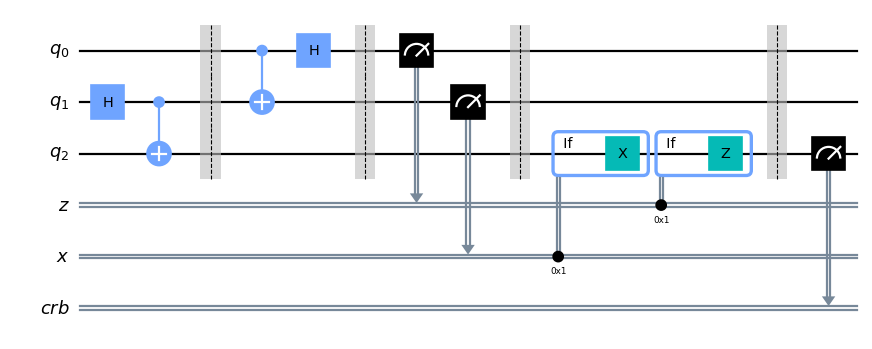

In [16]:
## STEP 5
qc_telep.measure(2,2)
qc_telep.draw('mpl', scale=.8,cregbundle=False) 

# Etat inconnu et téléportation

## Initialisation de l'état inconnu

L'état inconnu à téléporter peut être créé ainsi qu'il suit:

In [17]:
phi = random_statevector(2)
array_to_latex(phi, prefix="|φ\\rangle =",precision=3)

<IPython.core.display.Latex object>

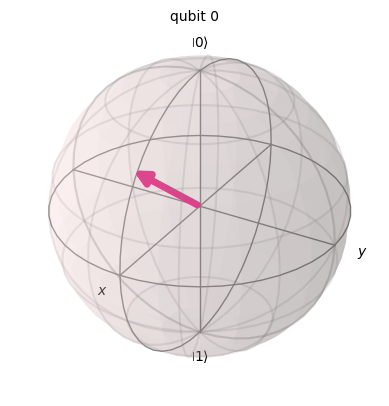

In [18]:
phi.draw('bloch')

Initialisons $\ket{\varphi}_0$ à partir de $q_0=\ket{0}$

In [19]:
from qiskit.extensions import Initialize

In [20]:
phi0 = Initialize(phi)
phi0.label = "|φ>_0="

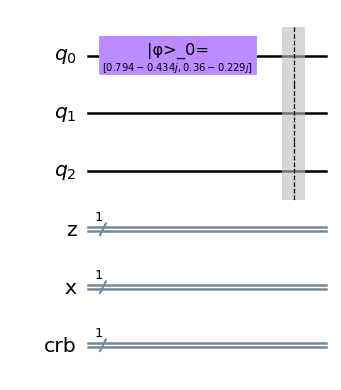

In [21]:
qc0 = QuantumCircuit(qr,crz,crx,crb) 
qc0.append(phi0, [0])
qc0.barrier()

qc0.draw('mpl',scale=.9)

# Mesure de l'état téléporté - Simulateur Statevector

Nous allons utiliser le simulateur statevector pour vérifier que notre qubit $\ket{\varphi}$ a été téléporté.

Il est important de souligner que ce simulateur n'admet pas de mesure à la fin. Ainsi, nous allons ignorer ici l'**Etape 5** où Bob effetue la mesure.

In [22]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.aer import StatevectorSimulator
from qiskit.circuit import IfElseOp

from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector

from qiskit.extensions import Initialize

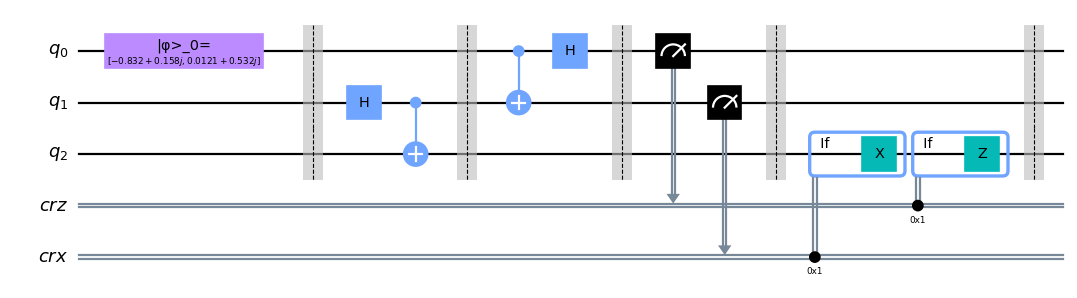

In [23]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
phi = random_statevector(2)

phi0 = Initialize(phi)
phi0.label = "|φ>_0="

teleportation_circuit.append(phi0, [0])
teleportation_circuit.barrier()

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier()

## STEP 2
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.barrier()

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.barrier()

## STEP 4
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.barrier()

#
teleportation_circuit.draw('mpl',cregbundle=False,scale=.8) 


* Information sur le circuit

In [24]:
teleportation_circuit.depth()

8

In [25]:
teleportation_circuit.size()

9

In [26]:
teleportation_circuit.width()

5

A l'entrée du circuit, on a

In [27]:
array_to_latex(phi, prefix="|φ\\rangle =",precision=3)

<IPython.core.display.Latex object>

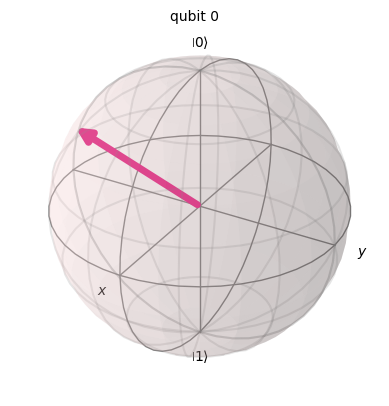

In [28]:
phi.draw('bloch')

A la sortie du circuit de téléportation, on a les trois qubits suivants:

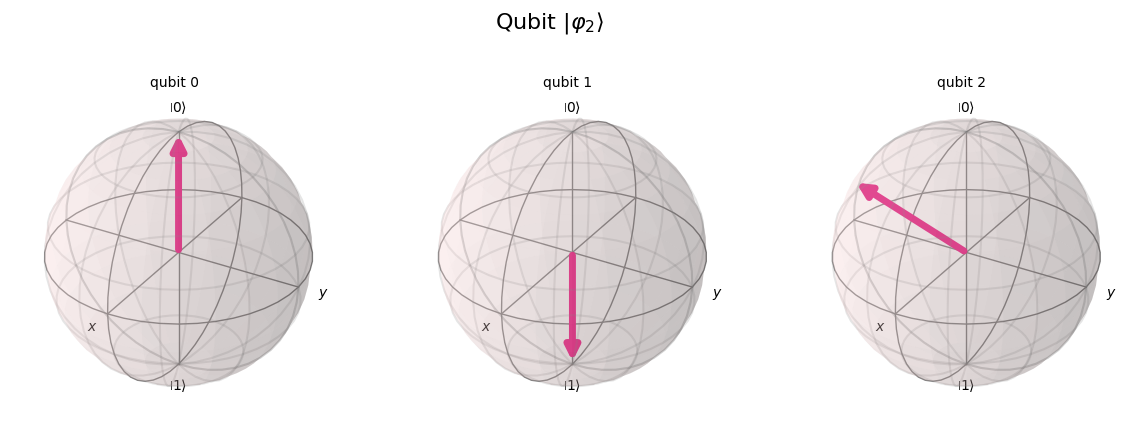

In [29]:
q_sim = StatevectorSimulator()
job = q_sim.run(teleportation_circuit).result()
phi2 = job.get_statevector()

plot_bloch_multivector(phi2, title='Qubit |$\\varphi_2\\rangle$')

In [30]:
array_to_latex(phi2,precision=3,prefix="|q_2q_1q_0\\rangle = ")

<IPython.core.display.Latex object>

On note que $\ket{q_2}=\ket{\varphi}$ comme souhaité, i.e, $\begin{pmatrix}\alpha\\\beta\end{pmatrix}
\otimes\begin{pmatrix}a_1\\b_1\end{pmatrix}\otimes\begin{pmatrix}a_0\\b_0\end{pmatrix}$ dans la configuration $\ket{q_2q_1q_0}$.

<div class="alert alert-info">
A chaque exécution du simulateur $|q_1q_0\rangle$ change d'état, mais le qubit $|q_2\rangle$ est toujours dans l'état $|q_2=\varphi\rangle$.</div>

# Simulation expérimentale  - Utilisation des comptages simulés

La téléportation quantique est conçue pour envoyer des qubits entre deux parties. Nous n'avons pas le matériel pour le démontrer, mais nous pouvons démontrer que les portes effectuent les transformations correctes sur une seule puce quantique. Ici, nous utilisons à nouveau le simulateur aer pour simuler comment nous pourrions tester notre protocole.

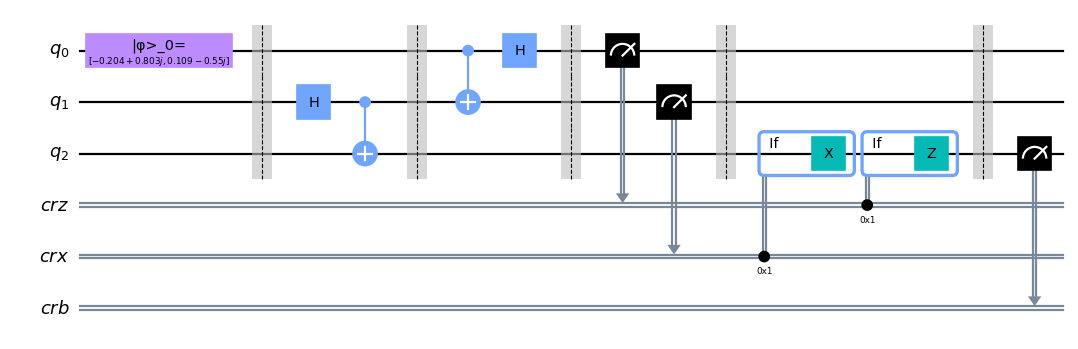

In [31]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
# include third register for measuring Bob's result
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
crb = ClassicalRegister(1, name="crb")
teleportation_circuit = QuantumCircuit(qr, crz, crx, crb)

## STEP 0
# First, let's initialize Alice's q0
phi = random_statevector(2)

phi0 = Initialize(phi)
phi0.label = "|φ>_0="

teleportation_circuit.append(phi0, [0])
teleportation_circuit.barrier()

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier()

## STEP 2
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.barrier()

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.barrier()

## STEP 4
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.barrier()

## STEP 5
teleportation_circuit.measure(2,2)

#
teleportation_circuit.draw('mpl',cregbundle=False,scale=.8) 


In [32]:
from qiskit import Aer, transpile
from qiskit.result import marginal_counts

La transpilation est le processus de réécriture d'un circuit d'entrée donné pour correspondre à la topologie d'un dispositif quantique spécifique, et/ou pour optimiser le circuit pour une exécution sur les systèmes quantiques bruyants actuels.

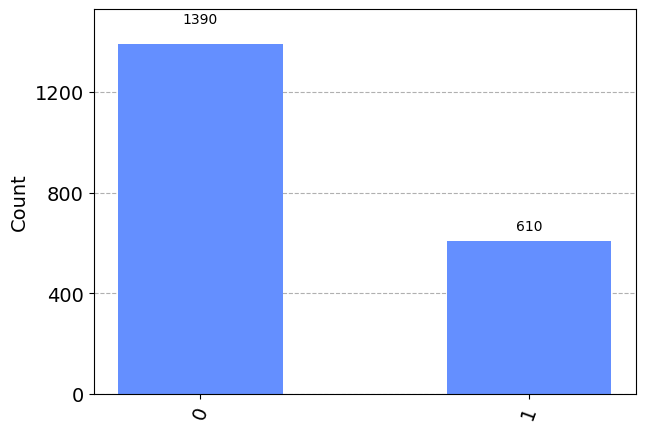

In [33]:
backend = Aer.get_backend('aer_simulator')

tqc_telepcount = transpile(teleportation_circuit, backend)
counts = backend.run(tqc_telepcount,shots=2000).result().get_counts()

# trace out Bob's results on qubit 2
bobs_qubit = 2
bobs_counts = marginal_counts(counts, [bobs_qubit])
plot_histogram(bobs_counts)

Nous constatons que nous avons une probabilité de 100%  de mesurer $\ket{q_2}$ (dans la chaîne $\ket{q_2q_1q_0}$) dans l'état $ |0\rangle$. Ceci est le résultat attendu et indique que le protocole de téléportation a fonctionné correctement.

Comme nous le voyons ici, il y a quelques résultats dans lesquels nous avons mesuré  |1⟩ . Celles-ci surviennent en raison d'erreurs dans les portes et les qubits. En revanche, notre simulateur dans la partie antérieure du Notebook  n'avait aucune erreur dans ses portes et permettait une téléportation sans erreur.

In [34]:
import qiskit.tools.jupyter #only in jupyter notebook
%qiskit_version_table